In [37]:



import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
dataset = read_csv('sonar.all-data.csv', header=None)

In [39]:
dataset.shape

(208, 61)

In [40]:
set_option('display.max_rows', 500)
dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object

In [41]:
set_option('display.width', 100)
dataset.head(20)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,1.670e-02,0.018,8.400e-03,9.000e-03,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,1.910e-02,0.014,4.900e-03,5.200e-03,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.009,0.018,2.440e-02,0.032,1.640e-02,9.500e-03,0.008,R
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.009,7.300e-03,0.005,4.400e-03,4.000e-03,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.011,0.011,1.500e-03,0.007,4.800e-03,1.070e-02,0.009,R
5,0.029,0.045,0.028,0.017,0.038,0.099,0.120,0.183,0.210,0.304,...,0.004,0.001,0.004,0.001,8.900e-03,0.006,2.700e-03,5.100e-03,0.006,R
6,0.032,0.096,0.132,0.141,0.167,0.171,0.073,0.140,0.208,0.351,...,0.020,0.025,0.013,0.007,1.380e-02,0.009,1.430e-02,3.600e-03,0.010,R
7,0.052,0.055,0.084,0.032,0.116,0.092,0.103,0.061,0.146,0.284,...,0.008,0.012,0.004,0.012,9.700e-03,0.009,4.700e-03,4.800e-03,0.005,R
8,0.022,0.037,0.048,0.048,0.065,0.059,0.075,0.010,0.068,0.149,...,0.015,0.013,0.015,0.006,4.900e-03,0.006,9.300e-03,5.900e-03,0.002,R
9,0.016,0.017,0.035,0.007,0.019,0.067,0.106,0.070,0.096,0.025,...,0.009,0.022,0.018,0.008,6.800e-03,0.003,3.500e-03,5.600e-03,0.004,R


In [42]:
set_option('precision', 3)
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [43]:
dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

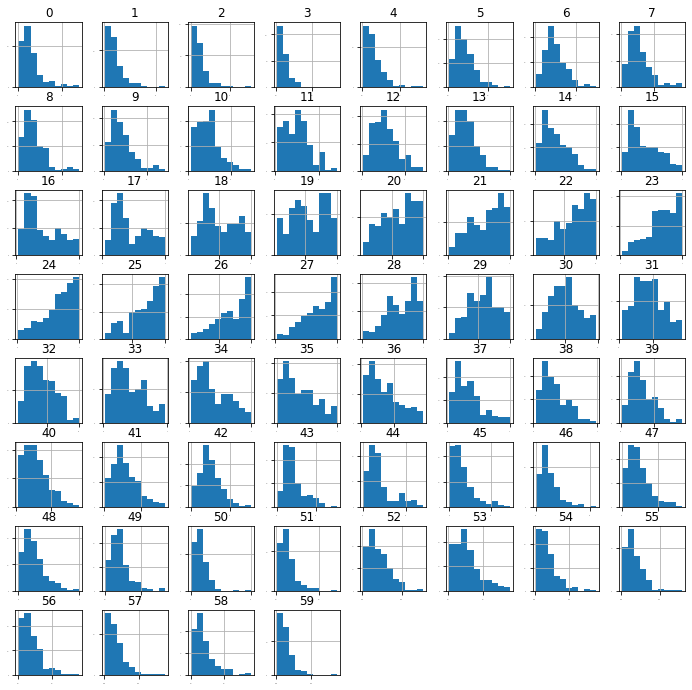

In [44]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()


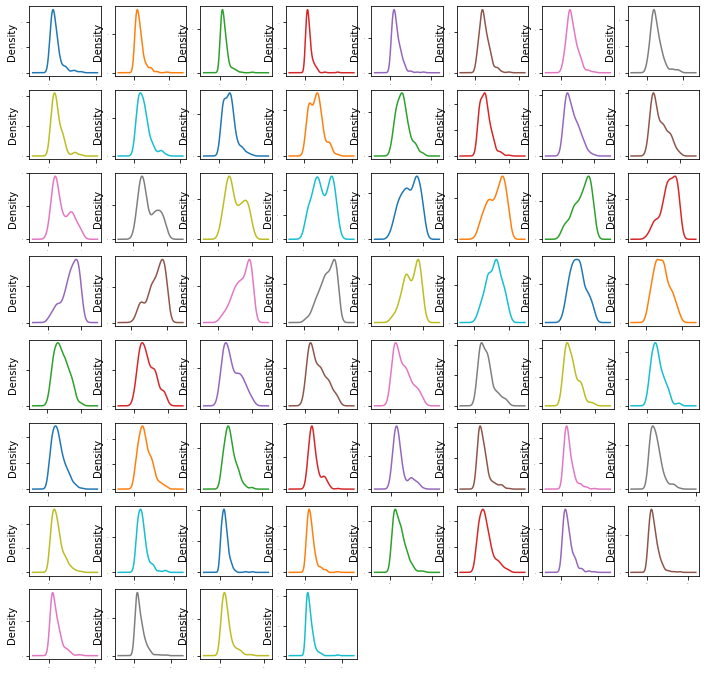

In [45]:
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
pyplot.show()

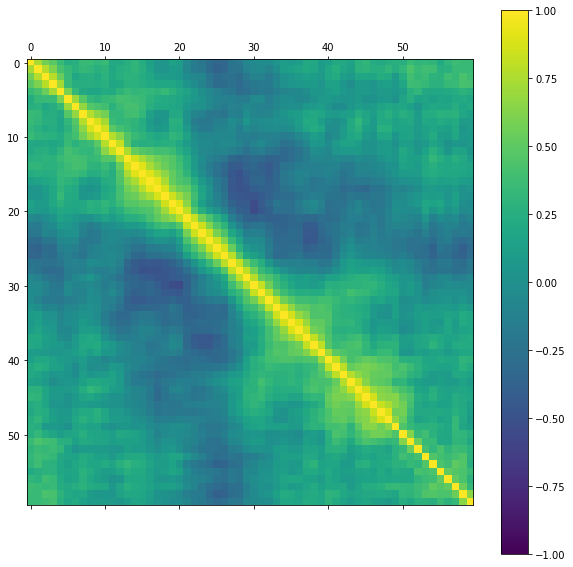

In [46]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)

pyplot.show()

In [47]:
array = dataset.values
X = array[:,0:-1].astype(float)
Y = array[:,-1]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [48]:

num_folds = 10
seed = 7
scoring = 'accuracy'

In [49]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [50]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.769485 (0.100510)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.746324 (0.117854)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.808088 (0.067507)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.740809 (0.106912)
NB: 0.648897 (0.141868)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.776471 (0.090411)


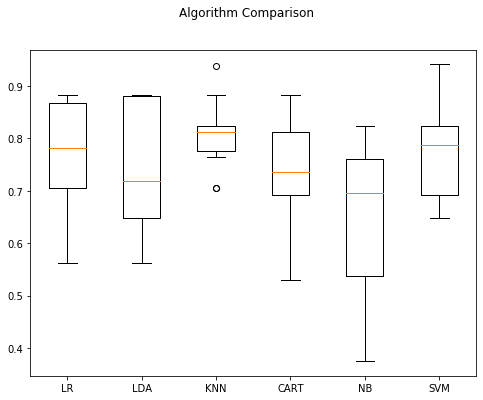

In [51]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

In [52]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

In [53]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLR: 0.740441 (0.094668)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledCART: 0.723162 (0.085149)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


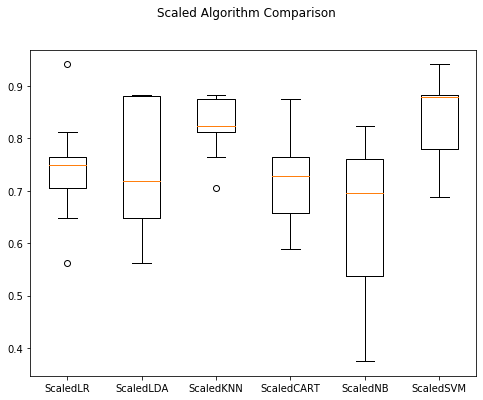

In [54]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

In [55]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [56]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.850000 using {'n_neighbors': 1}
#1 0.850000 (0.059686) with: {'n_neighbors': 1}
#3 0.837132 (0.066014) with: {'n_neighbors': 3}
#2 0.837500 (0.037377) with: {'n_neighbors': 5}
#4 0.763971 (0.089374) with: {'n_neighbors': 7}
#5 0.751471 (0.087051) with: {'n_neighbors': 9}
#6 0.733456 (0.104831) with: {'n_neighbors': 11}
#7 0.733088 (0.105806) with: {'n_neighbors': 13}
#8 0.727941 (0.076148) with: {'n_neighbors': 15}
#11 0.709926 (0.079287) with: {'n_neighbors': 17}
#9 0.722059 (0.085088) with: {'n_neighbors': 19}
#10 0.710294 (0.109505) with: {'n_neighbors': 21}


In [57]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [58]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.872426 using {'C': 2.0, 'kernel': 'rbf'}
#19 0.758456 (0.099483) with: {'C': 0.1, 'kernel': 'linear'}
#40 0.535294 (0.114222) with: {'C': 0.1, 'kernel': 'poly'}
#39 0.573162 (0.130930) with: {'C': 0.1, 'kernel': 'rbf'}
#36 0.704044 (0.066933) with: {'C': 0.1, 'kernel': 'sigmoid'}
#27 0.746324 (0.109507) with: {'C': 0.3, 'kernel': 'linear'}
#38 0.642647 (0.132187) with: {'C': 0.3, 'kernel': 'poly'}
#16 0.765809 (0.091692) with: {'C': 0.3, 'kernel': 'rbf'}
#31 0.734926 (0.054567) with: {'C': 0.3, 'kernel': 'sigmoid'}
#30 0.740074 (0.082636) with: {'C': 0.5, 'kernel': 'linear'}
#37 0.662132 (0.105668) with: {'C': 0.5, 'kernel': 'poly'}
#12 0.788235 (0.064190) with: {'C': 0.5, 'kernel': 'rbf'}
#25 0.746691 (0.058742) with: {'C': 0.5, 'kernel': 'sigmoid'}
#25 0.746691 (0.084198) with: {'C': 0.7, 'kernel': 'linear'}
#27 0.746324 (0.129754) with: {'C': 0.7, 'kernel': 'poly'}
#11 0.812500 (0.085513) with: {'C': 0.7, 'kernel': 'rbf'}
#17 0.758824 (0.047088) with: {'C': 0.7, 'kernel': 's

In [59]:
ensembles = []
# Boosting methods
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [60]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AB: 0.819853 (0.058293)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBM: 0.853676 (0.100318)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.830882 (0.079449)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ET: 0.866544 (0.089287)


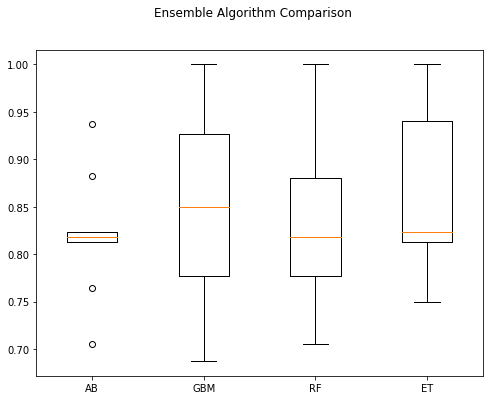

In [61]:
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

In [62]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5) 
model.fit(rescaledX, Y_train)

SVC(C=1.5)

In [63]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



In [64]:
predictions

array(['R', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'M',
       'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R'], dtype=object)

In [65]:
Y_validation

array(['R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M',
       'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R'], dtype=object)